In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('milk_promo_sales.csv')
df.head()

,store_id,period_id,sales_volume
0,4186684,226,1004.60
1,5219836,226,989.00
2,4185865,226,827.45
3,4186186,226,708.40
4,4523929,226,690.75


In [3]:
df.sort_values(['store_id', 'period_id'], inplace=True)
df.head()

,store_id,period_id,sales_volume
724224,4168621,191,2.25
216520,4168621,192,6.35
175105,4168621,193,7.05
699084,4168621,194,2.50
780957,4168621,195,1.70


In [4]:
df.reset_index(inplace=True, drop=True)
df.head()

,store_id,period_id,sales_volume
0,4168621,191,2.25
1,4168621,192,6.35
2,4168621,193,7.05
3,4168621,194,2.50
4,4168621,195,1.70


In [5]:
def promo_cw(row):
    result = [0]
    current_rating = 0
    
    
    for i in range (1, len(row)):
        current_rating += 1
    
        if (row.loc[i, 'period_id'] - row.loc[i-1, 'period_id'] > 1) or (row.loc[i, 'store_id'] != row.loc[i-1, 'store_id']):
            current_rating = 0
            
        result.append(current_rating)
        
    
    promo_cw = pd.Series(result)
    row['promo_cw'] = promo_cw
    return row.head()

In [6]:
promo_cw(df)

,store_id,period_id,sales_volume,promo_cw
0,4168621,191,2.25,0
1,4168621,192,6.35,1
2,4168621,193,7.05,2
3,4168621,194,2.50,3
4,4168621,195,1.70,4


In [7]:
def promo_id(row):
    current_rating_id = 1
    result = [1]
    
    for i in range (1, len(row)):
        
        current_rating_id += 1
        
        if row.loc[i, 'promo_cw'] != 0:
            
            current_rating_id -= 1
            
        if row.loc[i, 'store_id'] != row.loc[i-1, 'store_id']:
            
            current_rating_id = 1
    
        result.append(current_rating_id)

    promo_id = pd.Series(result)
    row['promo_id'] = promo_id
    return row.head()

In [8]:
promo_id(df)

,store_id,period_id,sales_volume,promo_cw,promo_id
0,4168621,191,2.25,0,1
1,4168621,192,6.35,1,1
2,4168621,193,7.05,2,1
3,4168621,194,2.50,3,1
4,4168621,195,1.70,4,1


Используя данные фактических продаж необходимо найти:

1. Общее количество промопериодов (во всех магазинах)

In [9]:
df[df.promo_cw == 0].count().promo_cw

140992

2. Медиану продолжительности промопериода (количество недель)

In [10]:
def promo_cw_median(df):
    result=[]
    for i in range(1, len(df)):
        if df.loc[i, 'promo_cw'] <= df.loc[i-1, 'promo_cw']:
            result.append(df.loc[i-1, 'promo_cw'])
            
    result.append(df.loc[i, 'promo_cw'])
    
    return result

In [11]:
promo_cw_median = pd.Series(promo_cw_median(df))

In [12]:
promo_cw_median.median()

2.0

In [13]:
promo_cw_median.describe()

count    140992.000000
mean          5.007362
std           7.771902
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max          51.000000
dtype: float64

In [14]:
%matplotlib inline

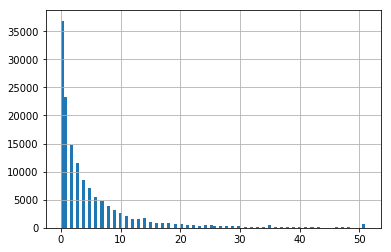

In [15]:
promo_cw_median.hist(bins = 100)

Если считать, что нулевая неделя была полной и первой (я заполнял таблицу как в примере), тогда 2 + 1 = 3

3. Объем  продаж по каждому промопериоду

In [16]:
promo_sales_volume = df.groupby(['store_id', 'promo_id']).sales_volume.sum()
promo_sales_volume

store_id  promo_id
4168621   1             86.3500
          2              9.9000
          3             15.8500
          4             18.2000
          5             48.3000
          6             52.9500
4168624   1           1489.3000
4168636   1              8.2000
          2             30.6500
          3             10.2500
          4             33.3000
          5             35.0000
          6             12.2000
4168639   1             12.6000
          2             59.0500
          3              6.6000
          4             80.8500
          5             26.3000
4168645   1            256.9000
          2             60.5500
4168648   1            109.9500
          2             58.1000
          3             17.0000
          4             36.7500
4168651   1             21.8000
          2             11.4500
          3              2.1500
          4              7.3500
          5            107.6500
          6              5.2500
                     

4. Медиану количества промопериодов на один магазин

In [17]:
df.promo_id.median()

3.0